In [35]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

### Задача 1
Даны значения величины заработной платы заемщиков банка (salary) и значения  
их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]  
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.  
1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии,  
   а затем с помощью метода наименьших квадратов.
2. Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии,  
   полученную в п. 1.
3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

In [36]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])  
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии

In [37]:
b1 = ((salary * scoring).mean() - salary.mean() * scoring.mean()) / ((salary ** 2).mean() - salary.mean() ** 2)
b0 = scoring.mean() - b1 * salary.mean()
print(f'Метод парной регрессии: scoring = {round(b0, 2)} + {round(b1, 2)} * salary')

Метод парной регрессии: scoring = 444.18 + 2.62 * salary


а затем с помощью метода наименьших квадратов

In [38]:
x = salary.reshape(-1, 1)
y = scoring.reshape(-1, 1)
ones = np.ones((x.shape[0], 1))
x = np.hstack((ones, x))

XTX = x.T.dot(x)
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(x.T).dot(y)
print(f'Метод наименьших квадратов: scoring = {round(b[0,0], 2)} + {round(b[1,0], 2)} * salary')

Метод наименьших квадратов: scoring = 444.18 + 2.62 * salary


Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии,  
полученную в п. 1.

Text(0, 0.5, 'scoring')

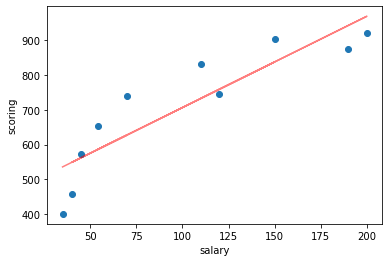

In [39]:
ox = salary
oy = b0 + b1 * salary

plt.scatter(salary, scoring)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('salary')
plt.ylabel('scoring')

Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.

In [40]:
predict = b0 + b1 * salary 

R = predict.var() / scoring.var()
print(f'Коэффициент детерминации равен {round(R, 4)}')
print(f'Коэффициент детерминации (через коэф. Пирсена) равен {round(np.corrcoef(salary, scoring)[0,1] ** 2, 4)}')

A = np.abs((scoring - predict) / scoring).mean()
print(f'Средняя ошибка апроксимации {round(A, 4)}')

Коэффициент детерминации равен 0.7876
Коэффициент детерминации (через коэф. Пирсена) равен 0.7876
Средняя ошибка апроксимации 0.1147


Оцените построенное уравнение регрессии с помощью F-критерия Фишера.

In [42]:
n = scoring.shape[0]
k = 1
k1 = k
k2 = n - k - 1
alpha = 0.05

T = (R / (1 - R)) * (k2 / k1)
F_crit = stats.f.ppf(1-alpha, k1, k2)
print(f'Уравнение регрессии статистически значимо {T > F_crit}, T = {round(T, 2)}, F_crit = {round(F_crit, 2)} ')

Уравнение регрессии статистически значимо True, T = 29.67, F_crit = 5.32 


Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

In [43]:
def standard_error_slope(x: np.array, y: np.array, z: np.array) -> float:
    n = x.shape[0]
    upper = ((y - z) ** 2).sum() / (n-2)
    lower = ((x - x.mean()) ** 2).sum()
    return np.sqrt(upper / lower)

s_slope = standard_error_slope(salary, scoring, predict)

alpha = 0.05
t = stats.t.ppf(1-alpha/2, df = salary.shape[0]-2)
interval_b1 = (b1 - t * s_slope, b1 + t * s_slope)
print(f'Доверительный интервал для b1 от {round(interval_b1[0], 2)} до {round(interval_b1[1], 2)} при alpha=0.05')

Доверительный интервал для b1 от 1.51 до 3.73 при alpha=0.05


In [44]:
def standard_error_intercept(x: np.array, y: np.array, z: np.array) -> float:
    return standard_error_slope(x, y, z) * np.sqrt((x**2).sum() / x.shape[0])

s_intercept = standard_error_intercept(salary, scoring, predict)

alpha = 0.05
t = stats.t.ppf(1-alpha/2, df = salary.shape[0]-2)
interval_b0 = (b0 - t * s_intercept, b0 + t * s_intercept)
print(f'Доверительный интервал для b0 от {round(interval_b0[0], 2)} до {round(interval_b0[1], 2)} при alpha=0.05')


Доверительный интервал для b0 от 313.97 до 574.39 при alpha=0.05


### Задача 2
Допустим, первые 5 клиентов из предыдущего задания проживают в Москве,  
а остальные - в Санкт-Петербурге.  
Влияет ли этот фактор на значение их кредитного скоринга?

In [10]:
msk = scoring[:5]
spb = scoring[5:]

msk_n = msk.shape[0]
spb_n = spb.shape[0]

msk_mean = msk.mean()
spb_mean = spb.mean()
scoring_mean = scoring.mean()

In [11]:
S2_F = msk_n * (msk_mean - scoring_mean) ** 2 + spb_n * (spb_mean - scoring_mean) ** 2
S2_res = ((msk - msk_mean)**2).sum() + ((spb - spb_mean)**2).sum()

Наблюдаю расхождение равенства в 0.01 примерно, неточно отрабатывает sum() 

In [12]:
S2_F + S2_res == ((scoring - scoring_mean)**2).sum()


False

In [13]:
k = 2
n = 10

k1 = k - 1
k2 = n - k

sigma2_F = S2_F / k1
sigma2_res = S2_res / k2

In [14]:
T = sigma2_F / sigma2_res
T

1.2650596914169643

In [15]:
alpha = 0.05
F_crit = stats.f.ppf(1 - alpha/2, k1, k2)
F_crit

7.57088209969174

In [16]:
print(f'T ({round(T, 2)}) < F_crit ({round(F_crit, 2)}), распределение по городам статистически не значимо')

T (1.27) < F_crit (7.57), распределение по городам статистически не значимо


### Задача 3
Посчитать коэффициенты линейной регрессии для т.н. Квартета Энскомба (см. урок 6).

In [17]:
import pandas as pd

In [18]:
df = pd.read_csv('anscombe.csv')

In [30]:
def get_coef(x: np.array, y: np.array) -> (float, float):
    b1 = np.cov(x, y)[0,1] / x.var(ddof=1)
    b0 = y.mean() - b1 * x.mean()
    return b0, b1

In [31]:
b0, b1 = get_coef(df.x1, df.y1)
print(f'Уравнение линейной регрессии Y = {round(b0, 2)} + {round(b1, 2)} * X для набора 1')

Уравнение линейной регрессии Y = 3.0 + 0.5 * X для набора 1


In [32]:
b0, b1 = get_coef(df.x2, df.y2)
print(f'Уравнение линейной регрессии Y = {round(b0, 2)} + {round(b1, 2)} * X для набора 2')

Уравнение линейной регрессии Y = 3.0 + 0.5 * X для набора 2


In [33]:
b0, b1 = get_coef(df.x3, df.y3)
print(f'Уравнение линейной регрессии Y = {round(b0, 2)} + {round(b1, 2)} * X для набора 3')

Уравнение линейной регрессии Y = 3.0 + 0.5 * X для набора 3


In [34]:
b0, b1 = get_coef(df.x4, df.y4)
print(f'Уравнение линейной регрессии Y = {round(b0, 2)} + {round(b1, 2)} * X для набора 4')

Уравнение линейной регрессии Y = 3.0 + 0.5 * X для набора 4
